# Methods

## Optimization and root finding

<span class="theorem-title">**Exercise 1**</span> Consider the function
$f(x,y)=1-(x-x_0)^2-0.5(y-y_0)^2$ with $x_0=0.5$ and $y_0=1.0$. Check
the documentation for `scipy.optimize`. Use it to maximze function $f$.

In [3]:
import numpy as np

In [4]:
x_0 = 0.5
y_0 = 1.0

In [5]:
# one needs to define $f$ as a function of a vector
f = lambda v: 1-(v[0]-x_0)**2-0.5*(v[1]-y_0)**2

In [6]:
f(np.array([0.2, 0.2]))

0.59

In [7]:
from scipy.optimize import minimize

sol = minimize(
        lambda u: -f(u),     # note the - here because we want to maximize
        np.array([0.2, 0.2])
)
sol

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.9999999999999428
        x: [ 5.000e-01  1.000e+00]
      nit: 6
      jac: [ 2.906e-07 -2.682e-07]
 hess_inv: [[ 5.041e-01 -7.380e-03]
            [-7.380e-03  1.013e+00]]
     nfev: 21
     njev: 7

In [8]:
sol.x

array([0.50000014, 0.99999973])

Consider the function $g(x)=0.1+exp(-x)x(1-x)$ over \[0,2\]. Choose the
scipy function and find the root of $g$.

In [12]:
from numpy import exp
g = lambda v: 0.1 + exp(-v)*v*(1-v)

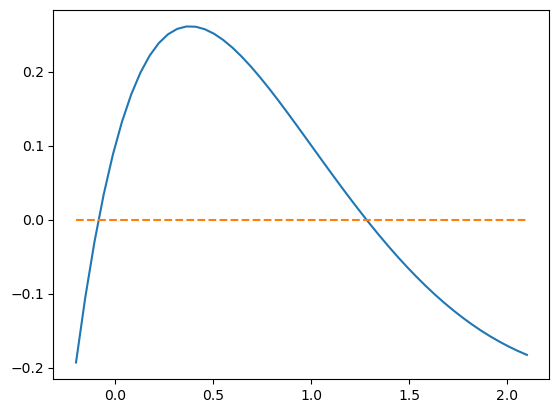

In [18]:
# let's visualize the function
# we see it has a root between 0 and 2 and another one smaller than 0
from matplotlib import pyplot as plt
xvec = np.linspace(-0.2,2.1)
plt.plot(xvec, g(xvec))
plt.plot(xvec, xvec*0, linestyle='--')

In [20]:
from scipy.optimize import root

In [21]:
sol = root(g, 0.1)
sol  # converges to the wrong solution

 message: The solution converged.
 success: True
  status: 1
     fun: [ 1.388e-17]
       x: [-8.470e-02]
  method: hybr
    nfev: 12
    fjac: [[-1.000e+00]]
       r: [-1.373e+00]
     qtf: [ 1.585e-14]

In [22]:
sol = root(g, 1)
sol  # converges to the wrong solution

 message: The solution converged.
 success: True
  status: 1
     fun: [ 6.939e-17]
       x: [ 1.281e+00]
  method: hybr
    nfev: 9
    fjac: [[-1.000e+00]]
       r: [ 3.339e-01]
     qtf: [-9.682e-11]

In [23]:
g(sol.x)

array([6.9388939e-17])

Consider the function $h(x,y)=[0.1+exp(-x)x(1-y), x-y]$. Choose
the scipy function and find the root of $g$. to find the root of $g$?

In [30]:
g = lambda v: np.array([0.1 + exp(-v[0])*v[0]*(1-v[1]), v[0]-v[1]])
sol = root(g, np.array([1.0, 0.0]))
sol

 message: The solution converged.
 success: True
  status: 1
     fun: [ 1.388e-16  0.000e+00]
       x: [ 1.281e+00  1.281e+00]
  method: hybr
    nfev: 10
    fjac: [[-1.507e-02 -9.999e-01]
           [ 9.999e-01 -1.507e-02]]
       r: [-1.000e+00  1.005e+00 -3.338e-01]
     qtf: [-2.710e-12  1.799e-10]

In [31]:
sol.x

array([1.28105226, 1.28105226])

In [32]:
g(sol.x)

array([1.38777878e-16, 0.00000000e+00])

## Interpolation

We consider the function
$f(x) = sinc(\lambda x) = \frac{sin(\lambda x)}{\lambda x}$. Let
$I=(x_i)_{i=[1,10]}$ be a regularly spaced interval between -2 and +2,
containing 10 points. Call $Y=(y_i)=f(x_i)$ the values of $f$ on this
interval. Let $T$ be a test set with 1000 regularly spaced points
between -2.5 and 2.5.

The goal is to compare several ways interpolate function f on $T$.

<span class="theorem-title">**Exercise 2**</span> Define `f`, `I`, `Y`,
`T` with numpy.

In [72]:
# this is a pure python
def f_pure(x, λ):
    from math import sin
    if x==0:
        return 1.0
    else:
        return sin(λ*x)/(λ*x)

In [49]:
f_pure(2.0, 0.1)
# f(np.array([1.5, 2.0]), 0.1)
# doesn't work with vector because of:
# 1. conditional statement
# 2. math.sin does not vectorize

0.09933466539753061

In [91]:
# we can use numpy syntax:
I = np.linspace(-2, 2, 10)
Y = np.where(I==0, 1., np.sin(I)/I) # we choose $lambda=1$ here

In [92]:
def f(x, λ):
    return np.where(x==0, 1., np.sin(x*λ)/(λ*x))

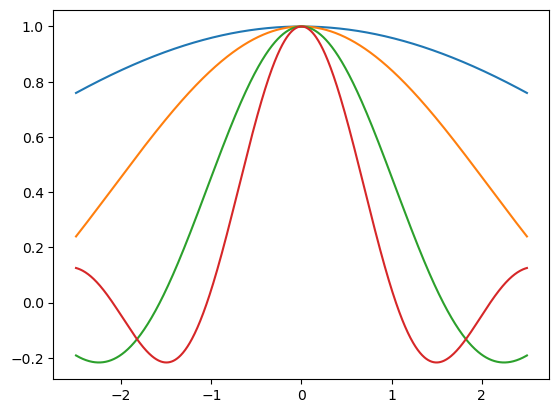

In [93]:
T = np.linspace(-2.5,2.5,1000)
plt.plot(T,f(T,0.5))
plt.plot(T,f(T,1))
plt.plot(T,f(T,2))
plt.plot(T,f(T,3))

<span class="theorem-title">**Exercise 3**</span> Construct a stepwise
approximation using numpy indexing

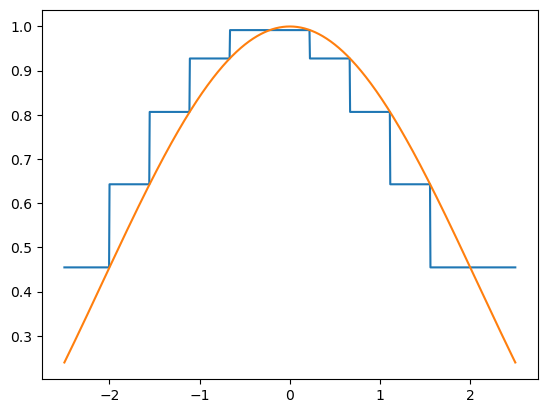

In [96]:
indices = np.searchsorted(I, T)
stepwise = Y[np.minimum(indices,9)]
plt.plot(T, stepwise,label="step")
plt.plot(T,f(T,1),label="true")


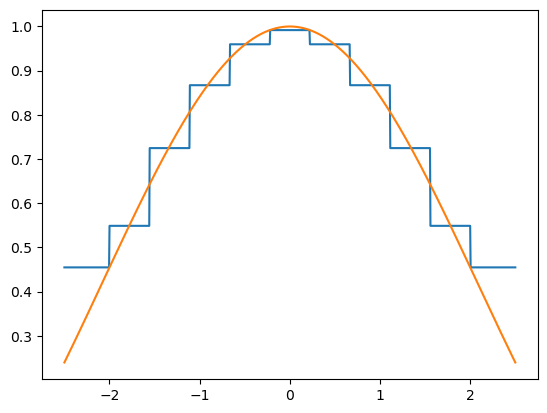

In [103]:
# We could do a better one by averaging two subsequent values
indices = np.searchsorted(I, T)-1
stepwise = (Y[np.minimum(indices+1,9)] + Y[np.maximum(indices,0)])/2
plt.plot(T, stepwise,label="step")
plt.plot(T,f(T,1),label="true")


<span class="theorem-title">**Exercise 4**</span> Plot it

In [6]:
# done above

<span class="theorem-title">**Exercise 5**</span> Construct a linear
approximation using numpy

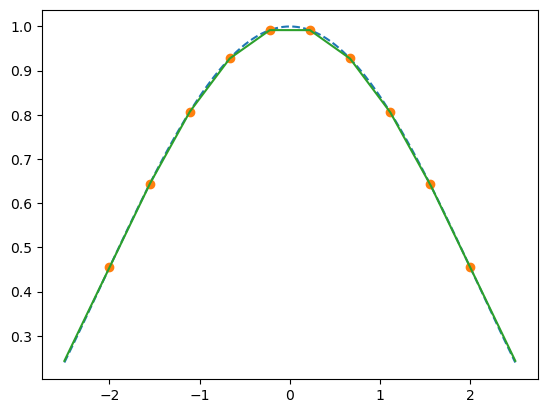

In [130]:
# instead of averageing two values, we can use a linear weighting scheme as follows:

indices = np.minimum( np.searchsorted(I, T)-1, 8 )
indices = np.maximum( indices, 0 )
x_i = I[indices]
x_ii = I[indices+1]
y_i = Y[indices]
y_ii = Y[indices+1]

lam = (T-x_i)/(x_ii-x_i)
# 
V = y_i + lam*(y_ii-y_i)

# lam = np.arange(0,len(T))/100-indices
plt.plot(T,f(T,1),label="true", linestyle="--")
plt.plot(I, Y, 'o', label="data")
plt.plot(T, V, label="interpolated")

<span class="theorem-title">**Exercise 6**</span> Use scipy.interpolate
to interpolate the data linearly. Compare the various extrapolation
options.

In [154]:
import scipy.interpolate
V_lin = scipy.interpolate.interp1d(I,Y, fill_value="extrapolate")(T)

<span class="theorem-title">**Exercise 7**</span> Use scipy.interpolate
to interolate the data with cubic splines. Compare the various
extrapolation options.

In [155]:
import scipy.interpolate
V_cub = scipy.interpolate.interp1d(I,Y, fill_value="extrapolate", kind='cubic')(T)

<span class="theorem-title">**Exercise 8**</span> Plot the results

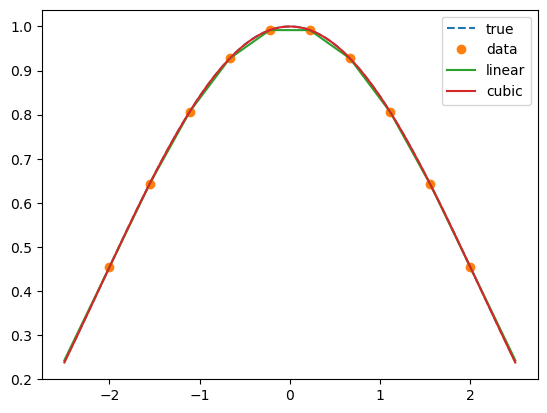

In [157]:
# lam = np.arange(0,len(T))/100-indices
plt.plot(T,f(T,1),label="true", linestyle="--")
plt.plot(I, Y, 'o', label="data")
plt.plot(T, V_lin, label="linear")
plt.plot(T, V_cub, label="cubic")
plt.legend(loc="upper right")

## Discretization

<span class="theorem-title">**Exercise 9**</span> Consider the AR1
process $y_t = \rho y_{t-1} + \epsilon_t$ where $\rho=0.9$ and
$\epsilon_t=0.01$. Use the `quantecon` library to discretize $(y_t)$ as
a discrete markov chain.

In [158]:
import quantecon as qe

ModuleNotFoundError: No module named 'quantecon'

<span class="theorem-title">**Exercise 10**</span> Suppose $\epsilon$
follows a normal law with standard deviation $σ = 0.05$. Take γ = 40 and
define $U(x)=(x^{-γ})/(-γ)$ We want to compute
$C(\epsilon) = \mathbb{E} [U(exp(\epsilon)) ]$.

-   Choose $N>0$ and construct a 1d vector with $N$ realizations of
    $\epsilon$. Use it to compute the expectation.
-   Estimate the standard deviation of this expectation.
-   Use gauss-hermite method from numpy to compute the same expectation.
-   Compare both methods.